### Multiple Densities

Thought that this was interesting enough to put in its own notebook.  

Filter and plot.
Description of data set up can be found here:  
https://github.com/slogmaverick/StataTuba/blob/master/src/notebooks/Basics/R%20Basics%201.ipynb


In [1]:
# Initialize the DataFrame.
library(dplyr)
library(ggplot2)
num_trials = 1000000 # 1M
df <- data_frame(true_average = rbeta(num_trials, 81, 219), hits = rbinom(num_trials, 300, true_average))


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



***
#### Filter Data Frame

Filter out just the hits between 40-100 to see how they look.  As always, take a look at the 

  true_average         hits       
 Min.   :0.1600   Min.   : 40.00  
 1st Qu.:0.2521   1st Qu.: 70.00  
 Median :0.2691   Median : 80.00  
 Mean   :0.2694   Mean   : 80.57  
 3rd Qu.:0.2863   3rd Qu.: 90.00  
 Max.   :0.3837   Max.   :100.00  

[1] 98417

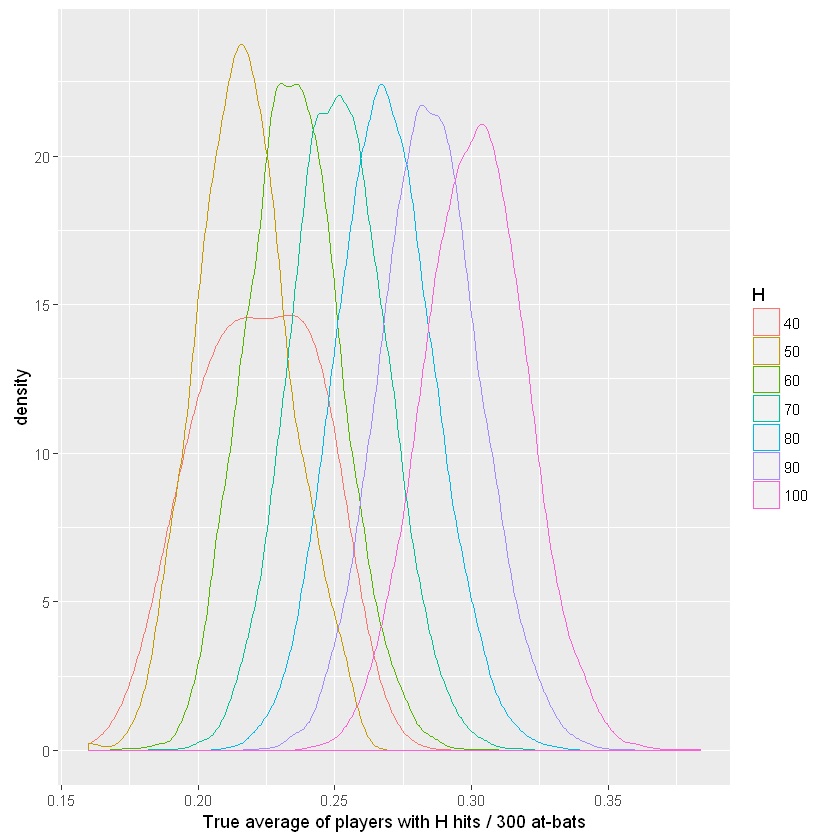

In [2]:
# filter out just hits between 40-100 in 10 hit increments
df_hits_filtered <- df %>% filter(hits %in% c(40,50,60,70,80,90,100))
summary(df_hits_filtered)
length(df_hits_filtered$hits)

df_hits_filtered %>% ggplot( aes( true_average, color = factor( hits))) + geom_density() + labs( x = "True average of players with H hits / 300 at-bats", color = "H")


#### Confirmation

The viz looks a little skewed at the start to me.  It probably has something to do with sample size at the lower numbers, let's validate what we are seeing.

Group the filtered dataset to show how many records there are for each Hits value.

In [6]:
# Use the aggregate function to group the dataframe by Hits and add the length
hits_grouped <- aggregate(df_hits_filtered, by=list('Hit Count' = df_hits_filtered$hits), FUN=length)
hits_grouped

# Filter by just 40 hits and list out every value.
hits_40 <- df %>% filter(hits == 40)
hits_40
length(hits_40$hits)



Hit Count,true_average,hits
40,5,5
50,387,387
60,5419,5419
70,23198,23198
80,36509,36509
90,24933,24933
100,7966,7966


true_average,hits
0.2416777,40
0.2430605,40
0.2104911,40
0.1946545,40
0.2201971,40


[1] 5